<a href="https://colab.research.google.com/github/Bhavnicksm/dsp_lab_notebooks/blob/main/EE333_Lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1

Generate a random matrix that has more columns than rows (fat-matrix) and Gram Schmidt
orthogonalization on it, to generate an orthonormal matrix, and a representation of the original
matrix with the newly generated orthonormal matrix as a basis.

In [208]:
import numpy as np
import matplotlib.pyplot as plt

In [209]:
A = np.random.rand(5,10)
print(A)

[[0.23496982 0.2972605  0.1349324  0.26667257 0.72070522 0.54275952
  0.52450101 0.37173452 0.29874791 0.79010705]
 [0.68923299 0.88606005 0.09317136 0.26949181 0.34664581 0.87400071
  0.3249261  0.5463962  0.17095048 0.28478361]
 [0.92776395 0.32164833 0.13993357 0.37187898 0.1976851  0.12320475
  0.23524573 0.27005379 0.43481539 0.33380322]
 [0.55750499 0.39483471 0.55608959 0.77222381 0.20072248 0.46926507
  0.87472995 0.06682708 0.34081243 0.44003127]
 [0.2581792  0.71115743 0.73928699 0.22816216 0.19294659 0.73652198
  0.32803018 0.37058744 0.16998199 0.23058921]]


In [210]:
def normalize(u):
  return u/(np.linalg.norm(u))

def project(u,v):
  '''
    Both u and v are assumed to be column vectors
  '''
  projection = (np.dot(u.T,v)/np.dot(u.T,u))*u
  return projection
  

In [211]:
def gram_shmidt(A: np.ndarray):
  E = []
  U = []
  for i in range(A.shape[0]):
    v = A[i,:]
    w = v - np.sum(np.asarray([project(u , v) for u in U]),axis=0)
    U.append(w)
    E.append(normalize(w))

  U = np.asarray(U)
  E = np.asarray(E)

  return E

In [212]:
basis = gram_shmidt(A)
basis.shape

(5, 10)

In [213]:
repr = A @ basis.T
repr

array([[ 1.47434963e+00,  2.48067497e-16,  3.15037333e-16,
         1.70824979e-16,  1.80829431e-16],
       [ 1.27757904e+00,  1.05248999e+00,  2.86324931e-16,
        -2.50879050e-16,  2.65210300e-17],
       [ 8.53542452e-01,  4.91053254e-01,  7.97137621e-01,
        -4.21619377e-16,  9.09350642e-18],
       [ 1.26280651e+00,  3.46523565e-01,  4.73686263e-01,
         8.79222480e-01,  2.96978669e-16],
       [ 1.02706835e+00,  7.03745943e-01, -1.36284260e-01,
         4.44921526e-01,  5.57714476e-01]])

In [214]:
np.mean(np.square(A - repr @ basis))

2.540301596646764e-32

# Question 2 & 3

Generate a stream of 96 random bits and transmit it at a bit rate of 5 mbps (million bits per second)
over a carrier frequency 50 MHz, and sampled at 500 MHz, examine the signal waveforms for
* BPSK
* QPSK
* 8-PSK
* 16-QAM
* 64-QAM.

Try to retrieve the transmitted bits from the modulated waveforms using a correlation receiver, since there is no additive noise, there should be no errors.

In [215]:
bitstream = np.random.randint(low = 0, high = 2, size = (96,))

print(bitstream.shape)
print(bitstream)

(96,)
[0 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 1 1 0
 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0 1]


In [216]:
# setting constants
transmission_rate = 5e6
f_c = 50e6
f_s = 500e6

## BPSK

In [217]:
num_symbs = 2
bits_per_symb = np.int32(np.ceil(np.log2(num_symbs)))

symb_time = bits_per_symb/transmission_rate 
print(f"Time per Symbol: {symb_time}s")

samples_per_symb = np.int32(np.round(symb_time*f_s))
print(f"Number of samples per symbol: {samples_per_symb}")

psk_out = np.zeros(int(samples_per_symb * len(bitstream)/bits_per_symb))

psk_theta = [2*np.pi*(m/num_symbs) for m in range(num_symbs)]
print(psk_theta)

Time per Symbol: 2e-07s
Number of samples per symbol: 100
[0.0, 3.141592653589793]


In [218]:
for i in range(0, len(bitstream), bits_per_symb):
  
  m = 0
  for j in range(bits_per_symb):
    m = 2*m + bitstream[i + j]
  
  for j in range(samples_per_symb):
    index = int((i/bits_per_symb) * samples_per_symb + j)
    t = float(index * (1/f_s))
    psk_out[index] = np.cos(2*(np.pi)*f_c*t + psk_theta[m])

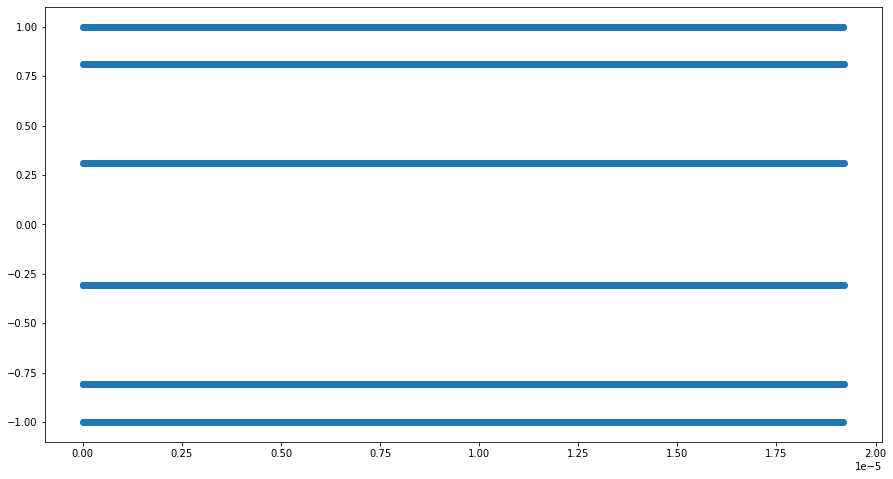

In [219]:
t = np.arange(0, len(psk_out) * (1/f_s) , (1/f_s))

plt.figure(figsize=(15,8))
plt.scatter(t, psk_out)
plt.show()

In [220]:
out = np.zeros_like(bitstream)

In [221]:
for i in range(0, len(bitstream), bits_per_symb):

  real_symb = psk_out[int(samples_per_symb * (i/bits_per_symb)) : int(samples_per_symb * ((i/bits_per_symb)+1))]
  

  symbs = np.zeros((num_symbs, samples_per_symb))
  t = np.arange(int(samples_per_symb * (i/bits_per_symb)), int(samples_per_symb * ((i/bits_per_symb)+1)), 1) * (1/f_s)
  for k in range(num_symbs):
    symbs[k,:] =  np.cos(2 * np.pi * f_c * t + psk_theta[k])
  
  corr = np.matmul(symbs, real_symb.T)
  symb_exp = np.argmax(corr)
  bits = "{0:b}".format(symb_exp).zfill(bits_per_symb)

  for j in range(bits_per_symb):
    out[i+j] = bits[j]  

In [222]:
out

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1])

In [223]:
print(f"MSE: {np.square(np.mean(bitstream - out))}")

MSE: 0.0


## QPSK

In [224]:
num_symbs = 4
bits_per_symb = np.int32(np.ceil(np.log2(num_symbs)))

symb_time = bits_per_symb/transmission_rate 
print(f"Time per Symbol: {symb_time}s")

samples_per_symb = np.int32(np.round(symb_time*f_s))
print(f"Number of samples per symbol: {samples_per_symb}")

psk_out = np.zeros(int(samples_per_symb * len(bitstream)/bits_per_symb))

psk_theta = [2*np.pi*(m/num_symbs) for m in range(num_symbs)]
print(psk_theta)

Time per Symbol: 4e-07s
Number of samples per symbol: 200
[0.0, 1.5707963267948966, 3.141592653589793, 4.71238898038469]


In [225]:
for i in range(0, len(bitstream), bits_per_symb):
  
  m = 0
  for j in range(bits_per_symb):
    m = 2*m + bitstream[i + j]
  
  for j in range(samples_per_symb):
    index = int((i/bits_per_symb) * samples_per_symb + j)
    t = float(index * (1/f_s))
    psk_out[index] = np.cos(2*(np.pi)*f_c*t + psk_theta[m])

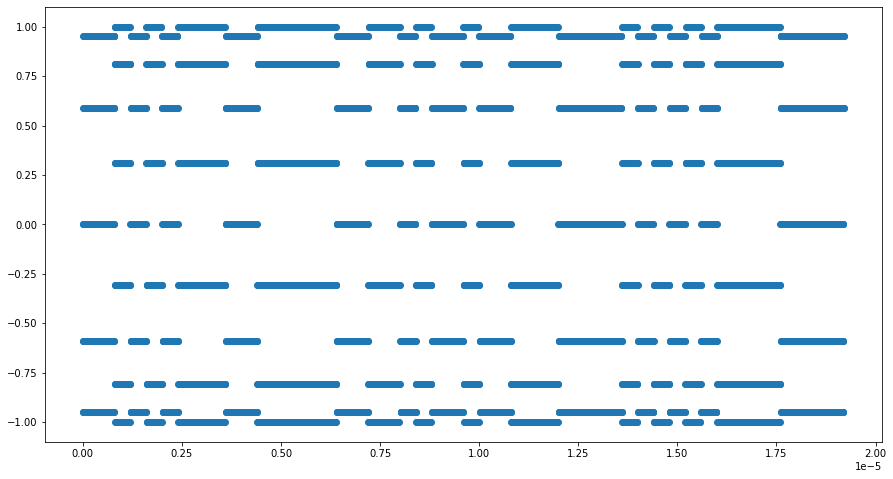

In [226]:
t = np.arange(0, len(psk_out) * (1/f_s) , (1/f_s))

plt.figure(figsize=(15,8))
plt.scatter(t, psk_out)
plt.show()

In [227]:
out = np.zeros_like(bitstream)

In [228]:
for i in range(0, len(bitstream), bits_per_symb):

  real_symb = psk_out[int(samples_per_symb * (i/bits_per_symb)) : int(samples_per_symb * ((i/bits_per_symb)+1))]
  

  symbs = np.zeros((num_symbs, samples_per_symb))
  t = np.arange(int(samples_per_symb * (i/bits_per_symb)), int(samples_per_symb * ((i/bits_per_symb)+1)), 1) * (1/f_s)
  for k in range(num_symbs):
    symbs[k,:] =  np.cos(2 * np.pi * f_c * t + psk_theta[k])
  
  corr = np.matmul(symbs, real_symb.T)
  symb_exp = np.argmax(corr)
  bits = "{0:b}".format(symb_exp).zfill(bits_per_symb)

  for j in range(bits_per_symb):
    out[i+j] = bits[j]  

In [229]:
out

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1])

In [230]:
print(f"MSE: {np.square(np.mean(bitstream - out))}")

MSE: 0.0


## 8-PSK

In [231]:
num_symbs = 8
bits_per_symb = np.int32(np.ceil(np.log2(num_symbs)))

symb_time = bits_per_symb/transmission_rate 
print(f"Time per Symbol: {symb_time}s")

samples_per_symb = np.int32(np.round(symb_time*f_s))
print(f"Number of samples per symbol: {samples_per_symb}")

psk_out = np.zeros(int(samples_per_symb * len(bitstream)/bits_per_symb))

psk_theta = [2*np.pi*(m/num_symbs) for m in range(num_symbs)]
print(psk_theta)

Time per Symbol: 6e-07s
Number of samples per symbol: 300
[0.0, 0.7853981633974483, 1.5707963267948966, 2.356194490192345, 3.141592653589793, 3.9269908169872414, 4.71238898038469, 5.497787143782138]


In [232]:
for i in range(0, len(bitstream), bits_per_symb):
  
  m = 0
  for j in range(bits_per_symb):
    m = 2*m + bitstream[i + j]
  
  for j in range(samples_per_symb):
    index = int((i/bits_per_symb) * samples_per_symb + j)
    t = float(index * (1/f_s))
    psk_out[index] = np.cos(2*(np.pi)*f_c*t + psk_theta[m])

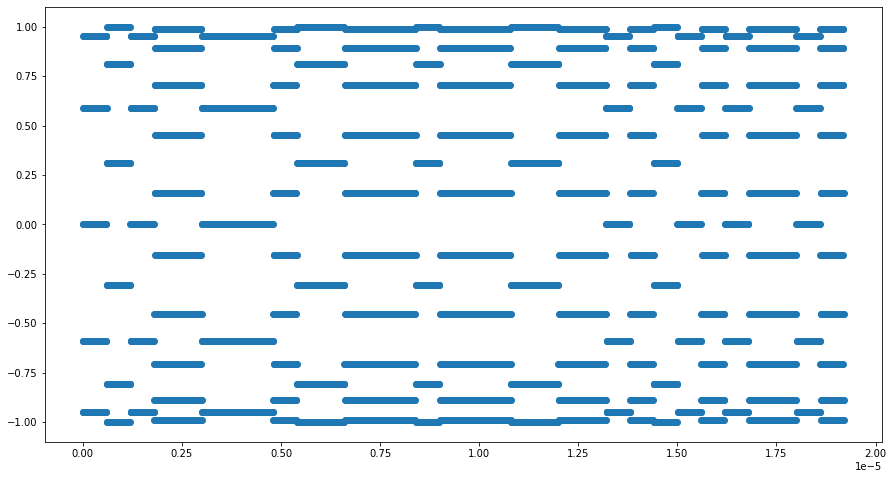

In [233]:
t = np.arange(0, len(psk_out) * (1/f_s) , (1/f_s))

plt.figure(figsize=(15,8))
plt.scatter(t, psk_out)
plt.show()

In [234]:
out = np.zeros_like(bitstream)

In [235]:
for i in range(0, len(bitstream), bits_per_symb):

  real_symb = psk_out[int(samples_per_symb * (i/bits_per_symb)) : int(samples_per_symb * ((i/bits_per_symb)+1))]
  

  symbs = np.zeros((num_symbs, samples_per_symb))
  t = np.arange(int(samples_per_symb * (i/bits_per_symb)), int(samples_per_symb * ((i/bits_per_symb)+1)), 1) * (1/f_s)
  for k in range(num_symbs):
    symbs[k,:] =  np.cos(2 * np.pi * f_c * t + psk_theta[k])
  
  corr = np.matmul(symbs, real_symb.T)
  symb_exp = np.argmax(corr)
  bits = "{0:b}".format(symb_exp).zfill(bits_per_symb)

  for j in range(bits_per_symb):
    out[i+j] = bits[j]  

In [236]:
out

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1])

In [237]:
print(f"MSE: {np.square(np.mean(bitstream - out))}")

MSE: 0.0


# 16 QAM

In [239]:
num_symbs = 16
bits_per_symb = np.int32(np.ceil(np.log2(num_symbs)))

symb_time = bits_per_symb/transmission_rate 
print(f"Time per Symbol: {symb_time}s")

samples_per_symb = np.int32(np.round(symb_time*f_s))
print(f"Number of samples per symbol: {samples_per_symb}")

# for square QAM
x_pts = 8
y_pts = 2

Ami = np.asarray( [2*i - (x_pts - 1) for i in range((x_pts))] )
Amq = np.asarray( [2*i - (y_pts - 1) for i in range(y_pts)] )

print(f"Ami: {Ami}")
print(f"Amq: {Amq}")

qam_out = np.zeros((np.int32(samples_per_symb * (len(bitstream)/bits_per_symb)),))

Time per Symbol: 8e-07s
Number of samples per symbol: 400
Ami: [-7 -5 -3 -1  1  3  5  7]
Amq: [-1  1]


In [246]:
for i in range(0, len(bitstream), bits_per_symb):
  
  m = 0
  for j in range(bits_per_symb):
    m = 2*m + bitstream[i + j]
  
  for j in range(samples_per_symb):
    index = int((i/bits_per_symb) * samples_per_symb + j)
    t = float(index * (1/f_s))
    angle = 2*np.pi*f_c*t

    m_real = m % x_pts
    m_img = m // x_pts

    A = np.complex(Ami[m_real], Amq[m_img])

    qam_out[index] = (A * np.exp(np.complex(0,angle))).real

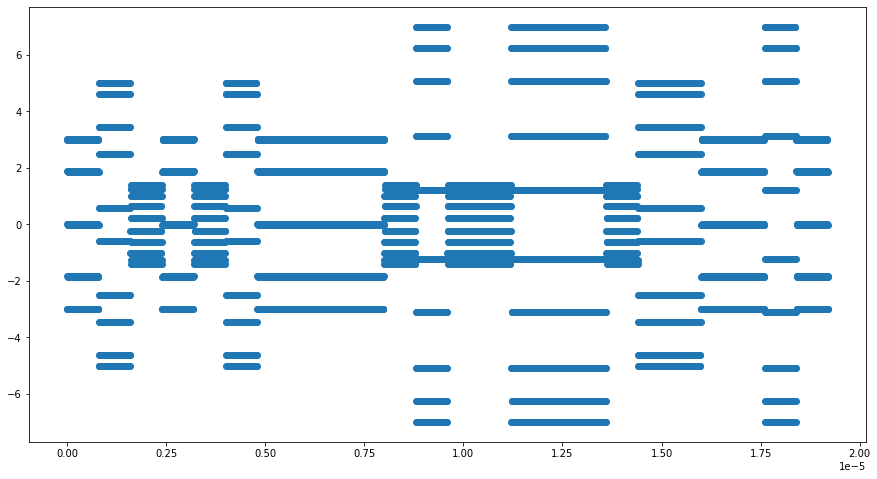

In [247]:
t = np.arange(0, len(qam_out) * (1/f_s) , (1/f_s))

plt.figure(figsize=(15,8))
plt.scatter(t, qam_out)
plt.show()

In [248]:
out = np.zeros_like(bitstream)

In [260]:
for i in range(0, len(bitstream), bits_per_symb):

  real_symb = qam_out[int((i/bits_per_symb)*samples_per_symb):int((i/bits_per_symb)*samples_per_symb) + samples_per_symb]
  real_symb = real_symb/np.linalg.norm(real_symb)

  symbs = np.zeros((num_symbs, samples_per_symb))

  t = np.arange(samples_per_symb * i, samples_per_symb * (i+1), 1) * (1/f_s)

  for j in range(num_symbs):
    m_real = j % x_pts
    m_img = j // x_pts

    A = np.complex(Ami[m_real], Amq[m_img])

    angle = 2*np.pi*f_c*t
    symb = np.asarray([ (A * np.exp(np.complex(0, 2*np.pi*f_c*ti))).real for ti in t  ]) 
    symbs[j,:] = symb/np.linalg.norm(symb) 
  
  corr = np.matmul(symbs, real_symb.T)
  symb_exp = np.argmax(corr)
  bits = "{0:b}".format(symb_exp).zfill(bits_per_symb)
  out[i:i+bits_per_symb] = [(1 if bits[k]=='1' else 0) for k in range(bits_per_symb)]

In [261]:
out

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1])

In [262]:
print(f"MSE: {np.square(np.mean(bitstream - out)): .4f}")

MSE:  0.0000


# 64 QAM

In [263]:
num_symbs = 64
bits_per_symb = np.int32(np.ceil(np.log2(num_symbs)))

symb_time = bits_per_symb/transmission_rate 
print(f"Time per Symbol: {symb_time}s")

samples_per_symb = np.int32(np.round(symb_time*f_s))
print(f"Number of samples per symbol: {samples_per_symb}")

# for square QAM
x_pts = 32
y_pts = 2

Ami = np.asarray( [2*i - (x_pts - 1) for i in range((x_pts))] )
Amq = np.asarray( [2*i - (y_pts - 1) for i in range(y_pts)] )

print(f"Ami: {Ami}")
print(f"Amq: {Amq}")

qam_out = np.zeros((np.int32(samples_per_symb * (len(bitstream)/bits_per_symb)),))

Time per Symbol: 1.2e-06s
Number of samples per symbol: 600
Ami: [-31 -29 -27 -25 -23 -21 -19 -17 -15 -13 -11  -9  -7  -5  -3  -1   1   3
   5   7   9  11  13  15  17  19  21  23  25  27  29  31]
Amq: [-1  1]


In [264]:
for i in range(0, len(bitstream), bits_per_symb):
  
  m = 0
  for j in range(bits_per_symb):
    m = 2*m + bitstream[i + j]
  
  for j in range(samples_per_symb):
    index = int((i/bits_per_symb) * samples_per_symb + j)
    t = float(index * (1/f_s))
    angle = 2*np.pi*f_c*t

    m_real = m % x_pts
    m_img = m // x_pts

    A = np.complex(Ami[m_real], Amq[m_img])

    qam_out[index] = (A * np.exp(np.complex(0,angle))).real

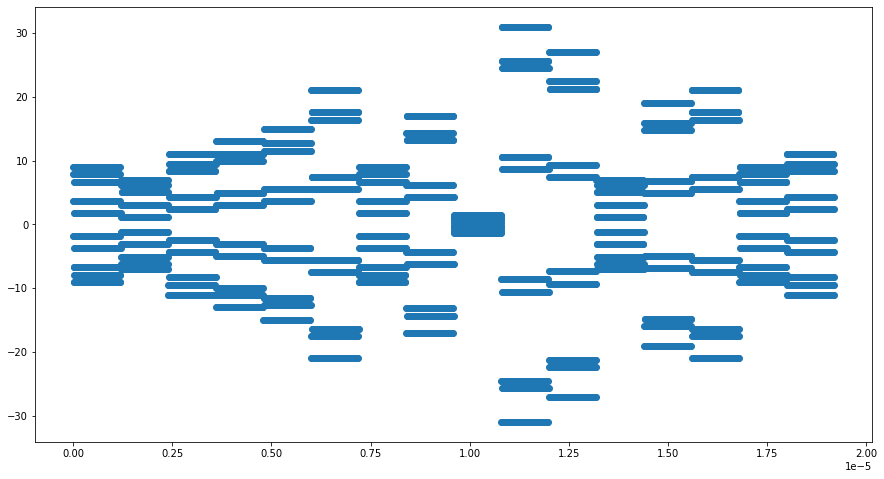

In [265]:
t = np.arange(0, len(qam_out) * (1/f_s) , (1/f_s))

plt.figure(figsize=(15,8))
plt.scatter(t, qam_out)
plt.show()

In [266]:
out = np.zeros_like(bitstream)

In [267]:
for i in range(0, len(bitstream), bits_per_symb):

  real_symb = qam_out[int((i/bits_per_symb)*samples_per_symb):int((i/bits_per_symb)*samples_per_symb) + samples_per_symb]
  real_symb = real_symb/np.linalg.norm(real_symb)

  symbs = np.zeros((num_symbs, samples_per_symb))

  t = np.arange(samples_per_symb * i, samples_per_symb * (i+1), 1) * (1/f_s)

  for j in range(num_symbs):
    m_real = j % x_pts
    m_img = j // x_pts

    A = np.complex(Ami[m_real], Amq[m_img])

    angle = 2*np.pi*f_c*t
    symb = np.asarray([ (A * np.exp(np.complex(0, 2*np.pi*f_c*ti))).real for ti in t  ]) 
    symbs[j,:] = symb/np.linalg.norm(symb) 
  
  corr = np.matmul(symbs, real_symb.T)
  symb_exp = np.argmax(corr)
  bits = "{0:b}".format(symb_exp).zfill(bits_per_symb)
  out[i:i+bits_per_symb] = [(1 if bits[k]=='1' else 0) for k in range(bits_per_symb)]

In [268]:
out

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1])

In [269]:
print(f"MSE: {np.square(np.mean(bitstream - out)): .4f}")

MSE:  0.0000
